<a href="https://colab.research.google.com/github/mehranommani/House_Prices_Predict/blob/main/house_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U pandas-profiling

In [7]:
import os
import numpy as np
import pandas as pd
import ydata_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [40]:
train = pd.read_csv('/train.csv')
test  = pd.read_csv('/test.csv')

In [36]:
# Generate a profile report for the 'train' DataFrame using the 'pp.ProfileReport' function
# This profile report provides insights and statistics about the dataset, including data types, missing values, and more.
# It can be helpful for data analysis and understanding the dataset's characteristics.
pp.ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)

## Train and Target

In [41]:
y = train[["Id", "SalePrice"]]
train = train.drop("SalePrice", axis=1)

In [12]:
# Combine the 'train' and 'test' DataFrames into a single DataFrame
all_dfs = [train,test]
all_df = pd.concat(all_dfs).reset_index(drop=True)

In [13]:
# Display the percentage of missing values for each column
display_all(all_df.isnull().sum()/all_df.shape[0])

In [14]:
# Remove the missing values
all_df.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],axis=1,inplace=True)

## Fill missing values

In [35]:
all_df['LotFrontage'].fillna(value=all_df['LotFrontage'].median(),inplace=True)
all_df['MasVnrType'].fillna(value='None',inplace=True)
all_df['MasVnrArea'].fillna(0,inplace=True)
all_df['BsmtCond'].fillna(value='TA',inplace=True)
all_df['BsmtExposure'].fillna(value='No',inplace=True)
all_df['Electrical'].fillna(value='SBrkr',inplace=True)
all_df['BsmtFinType2'].fillna(value='Unf',inplace=True)
all_df['GarageType'].fillna(value='Attchd',inplace=True)
all_df['GarageYrBlt'].fillna(value=all_df['GarageYrBlt'].median(),inplace=True)
all_df['GarageFinish'].fillna(value='Unf',inplace=True)
all_df['GarageQual'].fillna(value='TA',inplace=True)
all_df['GarageCond'].fillna(value='TA',inplace=True)
all_df['BsmtFinType1'].fillna(value='NO',inplace=True)
all_df['BsmtQual'].fillna(value='No',inplace=True)
all_df['BsmtFullBath'].fillna(value=all_df['BsmtFullBath'].median(),inplace=True)
all_df['BsmtFinSF1'].fillna(value=all_df['BsmtFinSF1'].median(),inplace=True)
all_df['BsmtFinSF2'].fillna(value=0,inplace=True)
all_df['BsmtUnfSF'].fillna(value=0,inplace=True)
all_df['TotalBsmtSF'].fillna(value=all_df['TotalBsmtSF'].median(),inplace=True)
all_df['BsmtHalfBath'].fillna(value=0,inplace=True)
all_df['GarageCars'].fillna(value=all_df['GarageCars'].median(),inplace=True)
all_df['GarageArea'].fillna(value=all_df['GarageArea'].median(),inplace=True)

transform categorical columns into numerical representations using label encoding

In [ ]:
labelencoder=LabelEncoder()

all_df['MSZoning']      = labelencoder.fit_transform(all_df['MSZoning'].astype(str))
all_df['Exterior1st']   = labelencoder.fit_transform(all_df['Exterior1st'].astype(str))
all_df['Exterior2nd']   = labelencoder.fit_transform(all_df['Exterior2nd'].astype(str))
all_df['KitchenQual']   = labelencoder.fit_transform(all_df['KitchenQual'].astype(str))
all_df['Functional']    = labelencoder.fit_transform(all_df['Functional'].astype(str))
all_df['SaleType']      = labelencoder.fit_transform(all_df['SaleType'].astype(str))
all_df['Street']        = labelencoder.fit_transform(all_df['Street'])
all_df['LotShape']      = labelencoder.fit_transform(all_df['LotShape'])
all_df['LandContour']   = labelencoder.fit_transform(all_df['LandContour'])
all_df['LotConfig']     = labelencoder.fit_transform(all_df['LotConfig'])
all_df['LandSlope']     = labelencoder.fit_transform(all_df['LandSlope'])
all_df['Neighborhood']  = labelencoder.fit_transform(all_df['Neighborhood'])
all_df['Condition1']    = labelencoder.fit_transform(all_df['Condition1'])
all_df['Condition2']    = labelencoder.fit_transform(all_df['Condition2'])
all_df['BldgType']      = labelencoder.fit_transform(all_df['BldgType'])
all_df['HouseStyle']    = labelencoder.fit_transform(all_df['HouseStyle'])
all_df['RoofStyle']     = labelencoder.fit_transform(all_df['RoofStyle'])
all_df['RoofMatl']      = labelencoder.fit_transform(all_df['RoofMatl'])
all_df['MasVnrType']    = labelencoder.fit_transform(all_df['MasVnrType'])
all_df['ExterQual']     = labelencoder.fit_transform(all_df['ExterQual'])
all_df['ExterCond']     = labelencoder.fit_transform(all_df['ExterCond'])
all_df['Foundation']    = labelencoder.fit_transform(all_df['Foundation'])
all_df['BsmtQual']      = labelencoder.fit_transform(all_df['BsmtQual'])
all_df['BsmtCond']      = labelencoder.fit_transform(all_df['BsmtCond'])
all_df['BsmtExposure']  = labelencoder.fit_transform(all_df['BsmtExposure'])
all_df['BsmtFinType1']  = labelencoder.fit_transform(all_df['BsmtFinType1'])
all_df['BsmtFinType2']  = labelencoder.fit_transform(all_df['BsmtFinType2'])
all_df['Heating']       = labelencoder.fit_transform(all_df['Heating'])
all_df['HeatingQC']     = labelencoder.fit_transform(all_df['HeatingQC'])
all_df['CentralAir']    = labelencoder.fit_transform(all_df['CentralAir'])
all_df['Electrical']    = labelencoder.fit_transform(all_df['Electrical'])
all_df['GarageType']    = labelencoder.fit_transform(all_df['GarageType'])
all_df['GarageFinish']  = labelencoder.fit_transform(all_df['GarageFinish'])
all_df['GarageQual']    = labelencoder.fit_transform(all_df['GarageQual'])
all_df['GarageCond']    = labelencoder.fit_transform(all_df['GarageCond'])
all_df['PavedDrive']    = labelencoder.fit_transform(all_df['PavedDrive'])
all_df['SaleCondition'] = labelencoder.fit_transform(all_df['SaleCondition'])

need to scale in case we want to use linear models

In [ ]:
Scaler       = StandardScaler()
all_scaled   = pd.DataFrame(Scaler.fit_transform(all_df))
train_scaled = pd.DataFrame(all_scaled[:1460])
test_scaled  = pd.DataFrame(all_scaled[1460:2920])

In [ ]:
X = train_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y['SalePrice'], test_size=0.1, random_state=42)

# XGBoost

In [ ]:
from xgboost import XGBRegressor
XGB = XGBRegressor(max_depth=2,learning_rate=0.1,n_estimators=1000,reg_alpha=0.001,reg_lambda=0.000001,n_jobs=-1,min_child_weight=3)
XGB.fit(X_train,y_train)

# Light GBM

In [ ]:
from lightgbm import LGBMRegressor
LGBM = LGBMRegressor(n_estimators = 1000)
LGBM.fit(X_train,y_train)

## our scores

In [ ]:
print ("Training score:",XGB.score(X_train,y_train), "Test Score:",XGB.score(X_test,y_test))
print ("Training score:",LGBM.score(X_train,y_train),"Test Score:",LGBM.score(X_test,y_test))

# blend 50% + 50%

In [ ]:
# Predict the sale prices
y_pred_xgb  = pd.DataFrame( XGB.predict(test_scaled))
y_pred_lgbm = pd.DataFrame(LGBM.predict(test_scaled))

y_pred=pd.DataFrame()

# Combine predictions from XGBoost and LightGBM using equal weights
y_pred['SalePrice'] = 0.5 * y_pred_xgb[0] + 0.5 * y_pred_lgbm[0]
y_pred['Id'] = test['Id']

# finally the submission

In [ ]:
y_pred.to_csv('house_price_blend.csv',index=False)

# Visualise the data to help us understand the current state

In [32]:
%matplotlib inline
import yellowbrick
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.model_selection import ValidationCurve

0.920257100589606

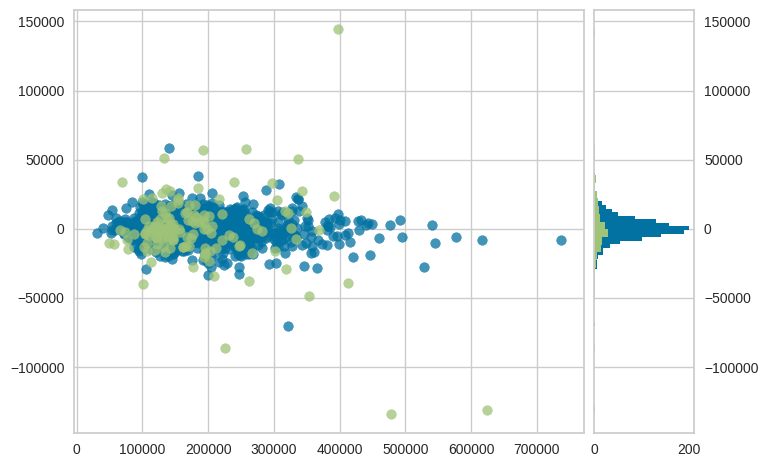

In [33]:
visualizer = ResidualsPlot(XGB)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)


0.8495537369561041

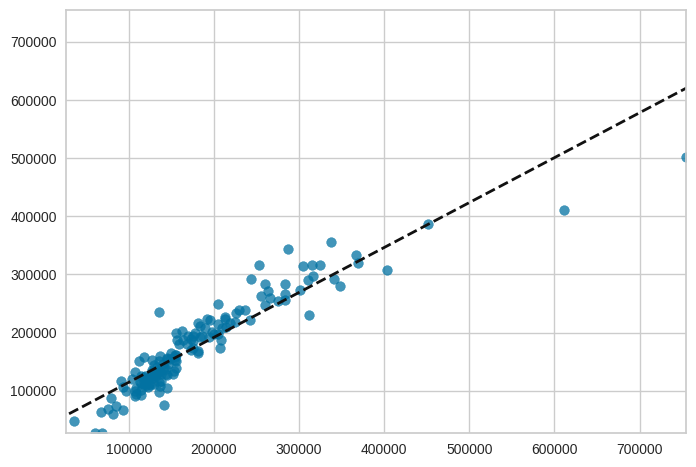

In [34]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=10)
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)